<a href="https://colab.research.google.com/github/Suhail-Shaik24/Fitness-App-Activity-Data-Statistics-and-Outlier-Detection/blob/main/FitnessApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# -------------------------------
# 1. Generate Sample Fitness Data
# -------------------------------
np.random.seed(42)
data = {
    'Steps': np.random.normal(7500, 2500, 100).astype(int),
    'Calories': np.random.normal(300, 80, 100).astype(int),
    'Active_Min': np.random.normal(40, 15, 100).astype(int),
    'Sleep_Hrs': np.random.normal(7, 1.2, 100).round(1)
}
df = pd.DataFrame(data)
desc_stats = df.describe()


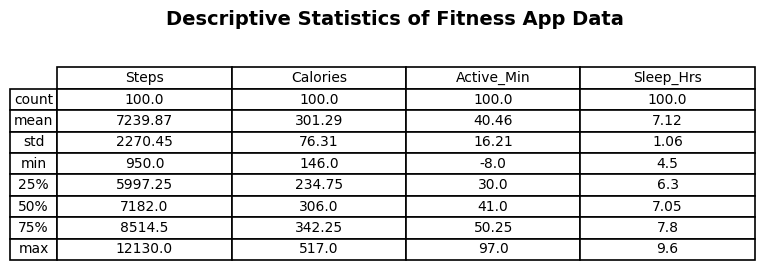

In [ ]:
# -------------------------------
# 2. Descriptive Statistics Table
# -------------------------------
# Create figure with slightly taller height for clarity
fig, ax = plt.subplots(figsize=(9,2.5))
ax.axis('off')  # remove axes

# Add table with thicker lines and more space
table = ax.table(
    cellText=np.round(desc_stats.values,2),
    rowLabels=desc_stats.index,
    colLabels=desc_stats.columns,
    cellLoc='center',
    rowLoc='center',
    colLoc='center',
    bbox=[0, 0, 1, 1]  # fill entire figure
)

# Customize font and line width
table.auto_set_font_size(False)
table.set_fontsize(10)
for key, cell in table.get_celld().items():
    cell.set_linewidth(1.2)      # thicker lines
    cell.set_edgecolor('black')   # clear black borders

# Add title using precise positioning
fig.text(0.5, 1.05, "Descriptive Statistics of Fitness App Data",
         ha='center', fontsize=14, fontweight='bold')

plt.show()
fig.savefig('descriptive_stats.png', bbox_inches='tight')

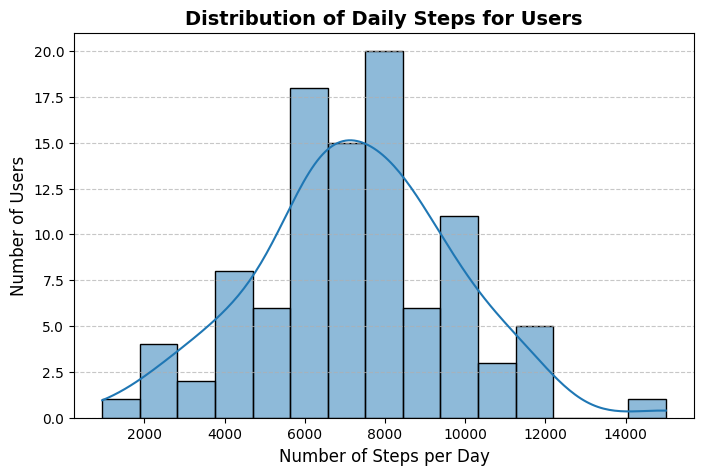

<Figure size 640x480 with 0 Axes>

In [ ]:
# -------------------------------
# 3. Histogram for Steps
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Steps'], bins=15, kde=True, color='#1f77b4', edgecolor='black')
plt.title("Distribution of Daily Steps for Users", fontsize=14, fontweight='bold')
plt.xlabel("Number of Steps per Day", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig('steps_histogram.png')


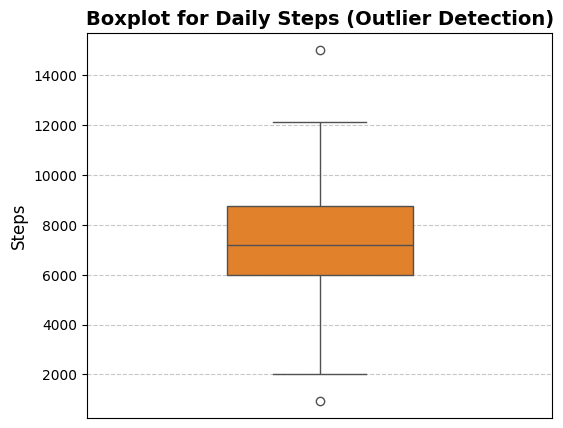

<Figure size 640x480 with 0 Axes>

In [ ]:
# -------------------------------
# 4. Boxplot for Outliers
# -------------------------------
plt.figure(figsize=(6,5))
sns.boxplot(y=df['Steps'], color='#ff7f0e', width=0.4)
plt.title("Boxplot for Daily Steps (Outlier Detection)", fontsize=14, fontweight='bold')
plt.ylabel("Steps", fontsize=12)
plt.xticks([])  # remove x ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig('steps_boxplot.png')

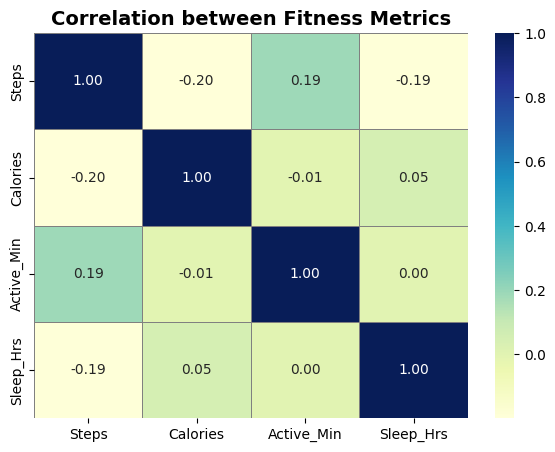

<Figure size 640x480 with 0 Axes>

In [ ]:
# -------------------------------
# 5. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(7,5))
corr = df[['Steps', 'Calories', 'Active_Min', 'Sleep_Hrs']].corr()
sns.heatmap(
    corr, annot=True, cmap='YlGnBu', fmt=".2f",
    linewidths=0.5, linecolor='gray', cbar=True
)
plt.title("Correlation between Fitness Metrics", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.savefig('correlation_heatmap.png')

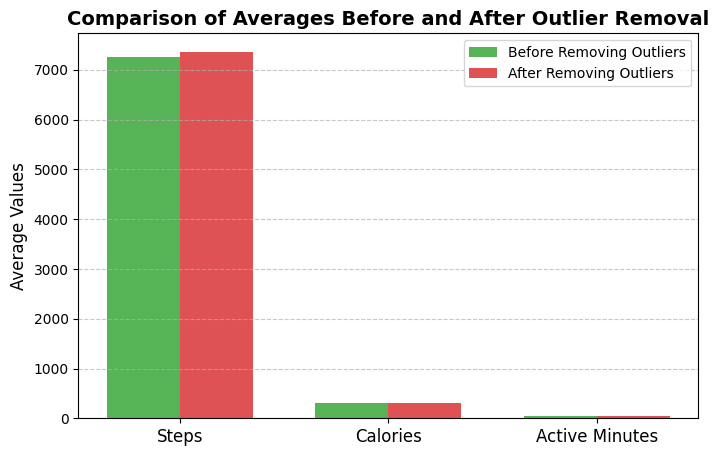

<Figure size 640x480 with 0 Axes>

In [ ]:
# -------------------------------
# 6. Remove Outliers (IQR) and compare averages
# -------------------------------
Q1 = df[['Steps', 'Calories', 'Active_Min']].quantile(0.25)
Q3 = df[['Steps', 'Calories', 'Active_Min']].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[['Steps','Calories','Active_Min']] < (Q1 - 1.5 * IQR)) |
                       (df[['Steps','Calories','Active_Min']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Average before and after
avg_before = df[['Steps', 'Calories', 'Active_Min']].mean()
avg_after = df_no_outliers[['Steps', 'Calories', 'Active_Min']].mean()

plt.figure(figsize=(8,5))
x = np.arange(len(avg_before))
width = 0.35
plt.bar(x - width/2, avg_before, width, label='Before Removing Outliers', color='#2ca02c', alpha=0.8)
plt.bar(x + width/2, avg_after, width, label='After Removing Outliers', color='#d62728', alpha=0.8)
plt.xticks(x, ['Steps','Calories','Active Minutes'], fontsize=12)
plt.ylabel("Average Values", fontsize=12)
plt.title("Comparison of Averages Before and After Outlier Removal", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig('average_comparison.png')
